# INTRODUCTION

 
Embark on a journey back in time to the Mesozoic Era, where dinosaurs reigned supreme. Our dataset comprises 4951 occurrences of various dinosaur species, complete with their dietary habits, sizes, temporal ranges, and geographical locations. Let's dig deep into this prehistoric world to uncover intriguing patterns and insights.

Created BY - Aryan Thapa Magar

# **Importing Libaries**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Basic Information

In [5]:
df = pd.read_csv('data/dinosaurs.csv')

In [9]:
df.head()

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae


Here we can see a sample of the dataset 
    

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           4951 non-null   object 
 3   type           4951 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         4951 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB


In [18]:
df.describe()

,occurrence_no,length_m,max_ma,min_ma,lng,lat
count,4.951000e+03,3568.000000,4951.000000,4951.000000,4951.000000,4951.000000
mean,6.838323e+05,8.212688,117.518477,106.622270,-37.048675,34.591448
std,3.021524e+05,6.629887,45.270821,44.395885,84.591106,23.961138
min,1.302090e+05,0.450000,70.600000,66.000000,-153.247498,-84.333336
25%,4.871225e+05,3.000000,83.500000,70.600000,-108.258705,36.274439
50%,5.618050e+05,6.700000,99.600000,89.800000,-96.099998,42.611198
75%,8.675665e+05,10.000000,155.700000,145.000000,27.383331,47.745138
max,1.365954e+06,35.000000,252.170000,247.200000,565.000000,78.101875


Now we have all the stats of the dataset we are going to use

In [10]:
df.isnull()

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,False,False,True,True,True,False,False,False,False,False,False,True
4947,False,False,False,False,False,False,False,False,False,False,False,False
4948,False,False,True,True,True,False,False,False,False,False,False,True
4949,False,False,False,False,False,False,False,False,False,False,False,True


We can clearly see the number of  values that are null(empty)

We have to emilinate these null values as it may interfare with our analysis.

#  **VISULAZING THE NULL VALUES**

In [23]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

occurrence_no    0.000000
name             0.000000
diet             0.000000
type             0.000000
length_m         0.000000
max_ma           0.000000
min_ma           0.000000
region           0.000000
lng              0.000000
lat              0.000000
class            0.000000
family           0.000000
age_binned       9.028479
length_binned    0.000000
dtype: float64


Here the percentage of missing data is shown (only of numeric columns)

<AxesSubplot: >

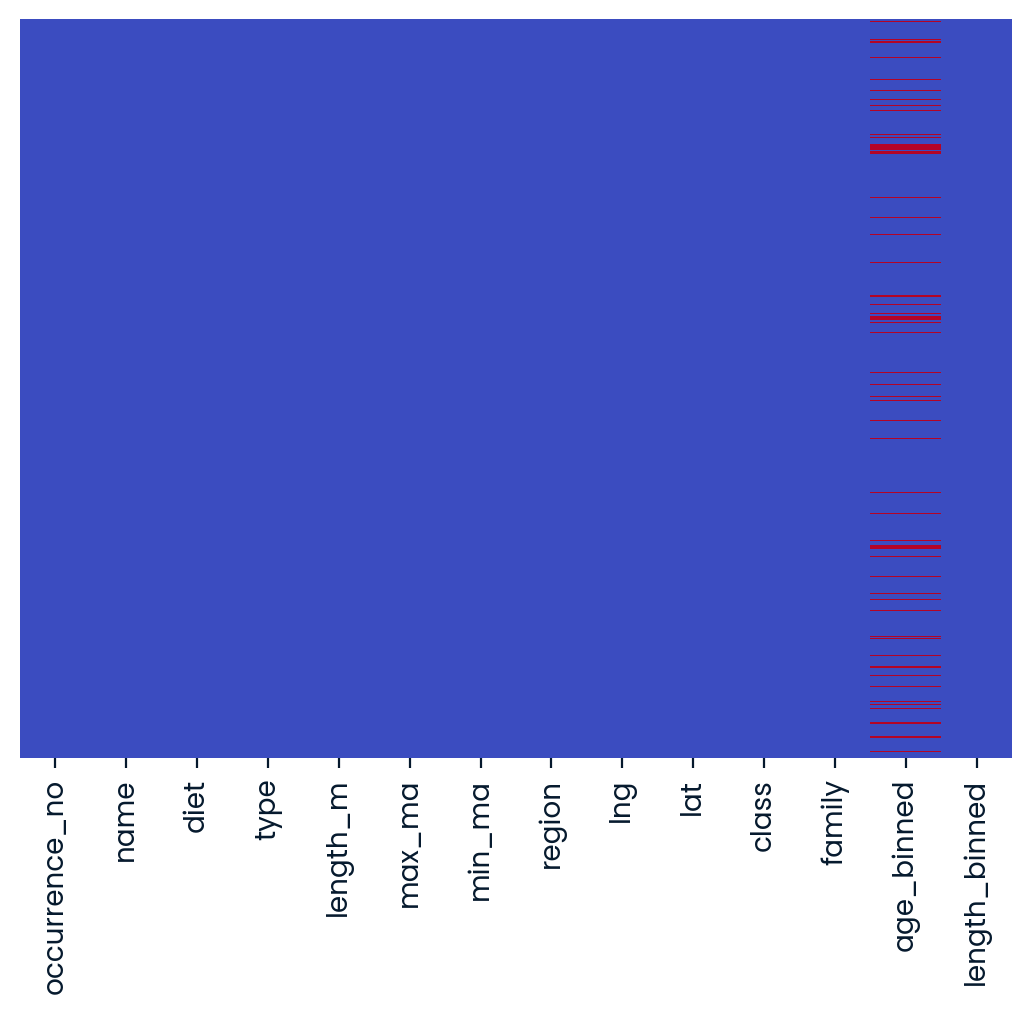

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

This upper chart is called heat map. The red lines represent the null values.
So, 'occurrence_no' , 'name' ,'max_ma' ,'min_ma' , 'lng' , 'lat' and 'class' coloums don't have any null values.

# Handling the missing values

In [7]:
# Impute missing values for 'length_m' with the mean
df['length_m'].fillna(df['length_m'].mean(), inplace=True)

# Fill missing values for categorical columns with 'Unknown'
df['diet'].fillna('Unknown', inplace=True)
df['type'].fillna('Unknown', inplace=True)
df['region'].fillna('Unknown', inplace=True)
df['family'].fillna('Unknown', inplace=True)

<AxesSubplot: >

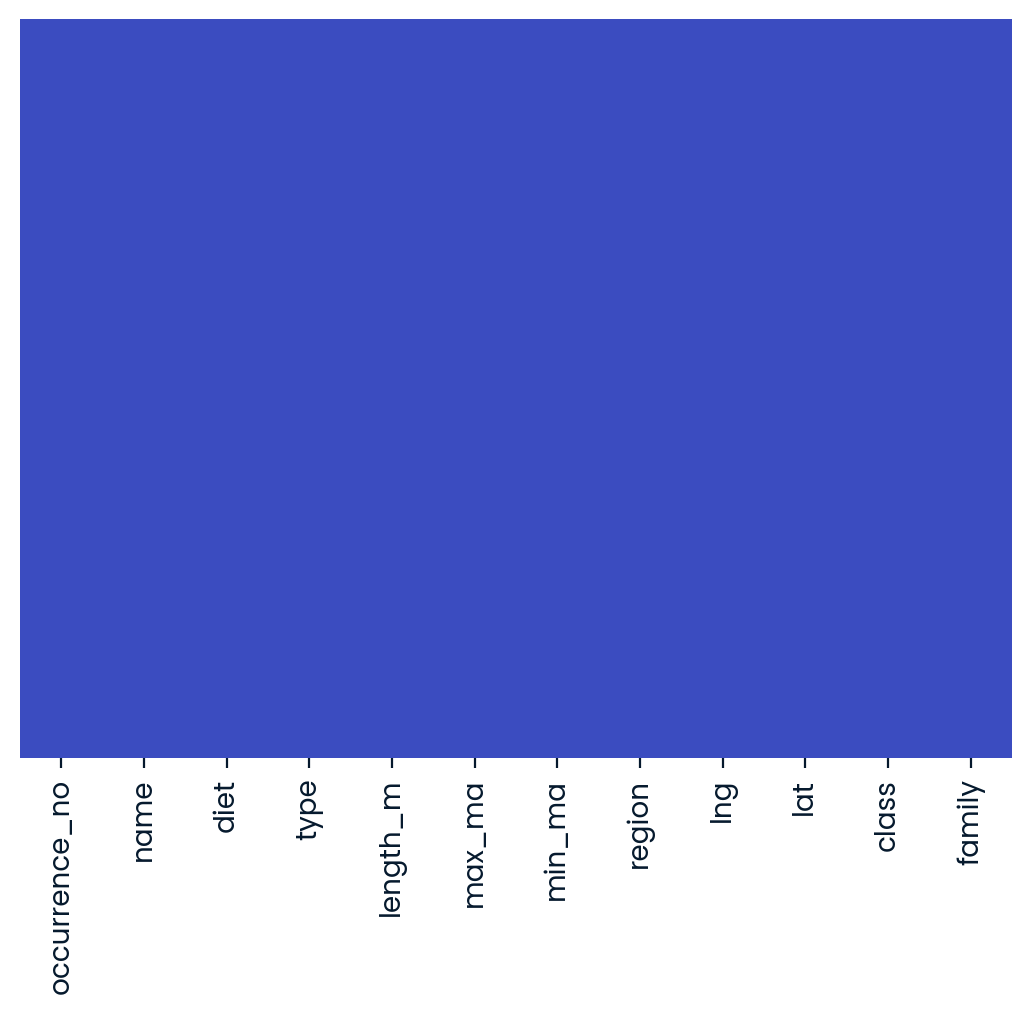

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Here we have eliminated all null values that may interfear with our analysis

# Distribution of numerical columns


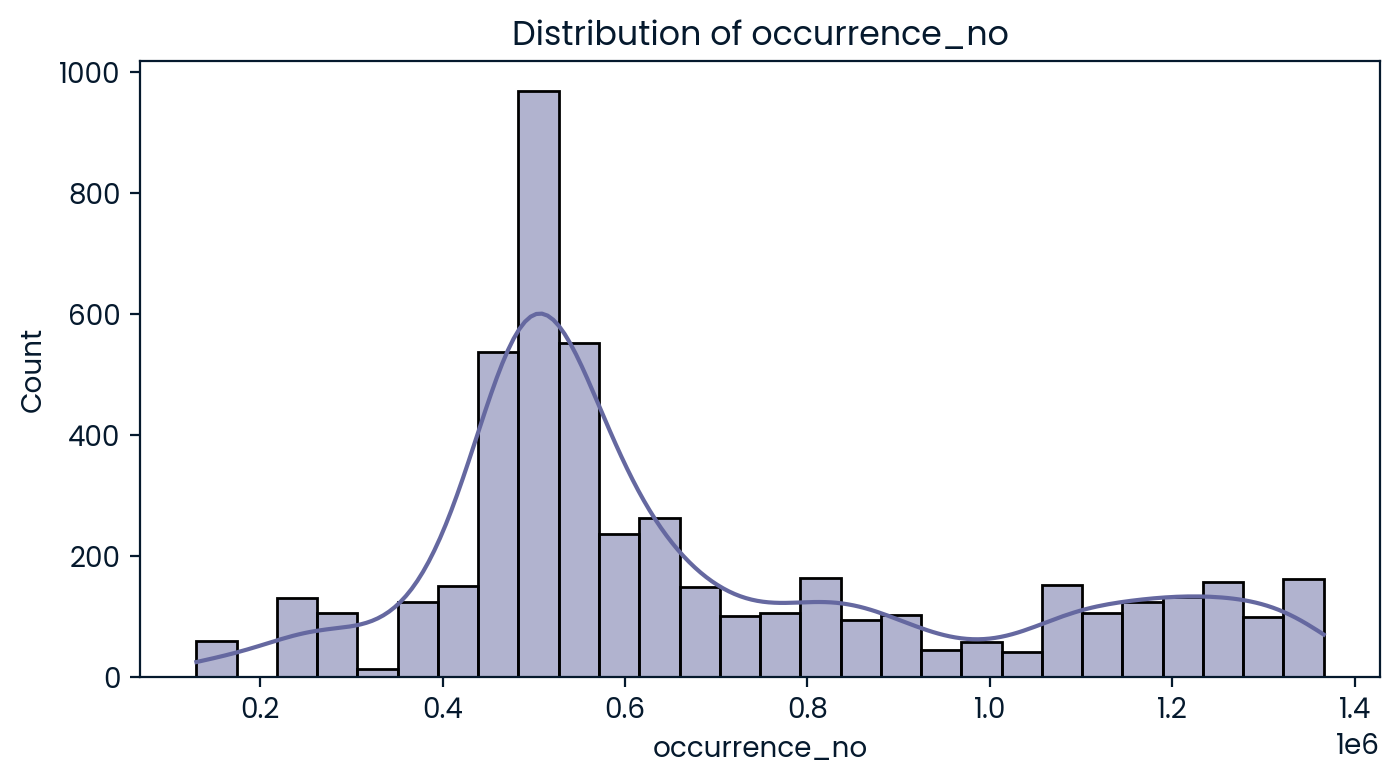

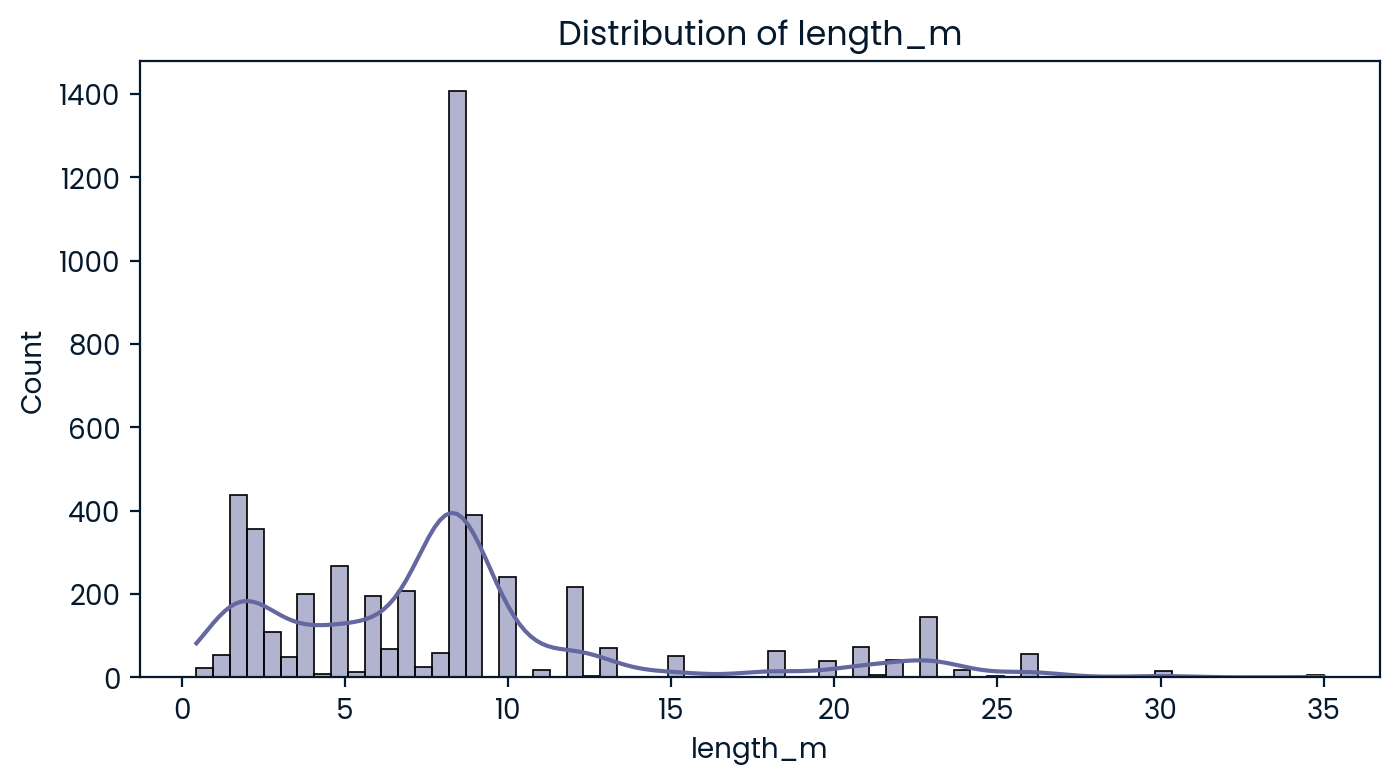

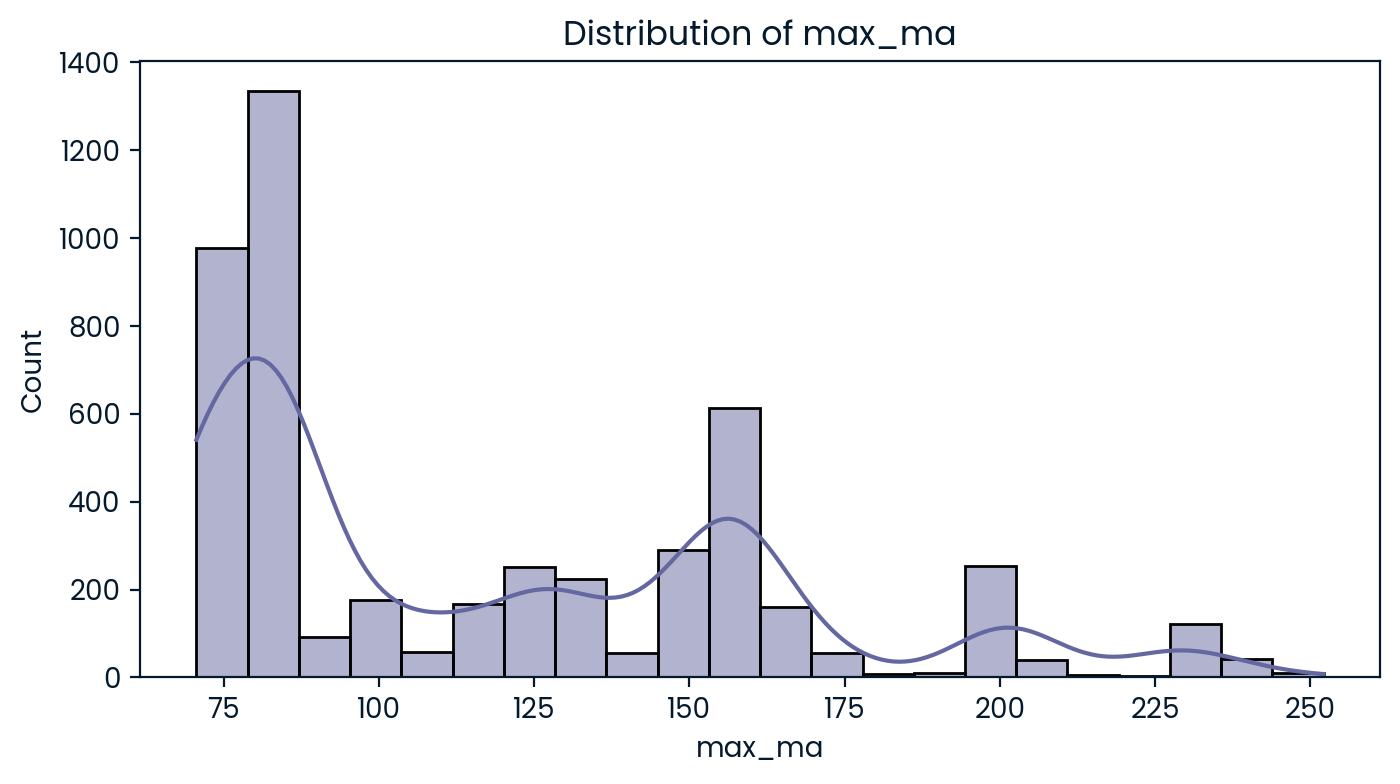

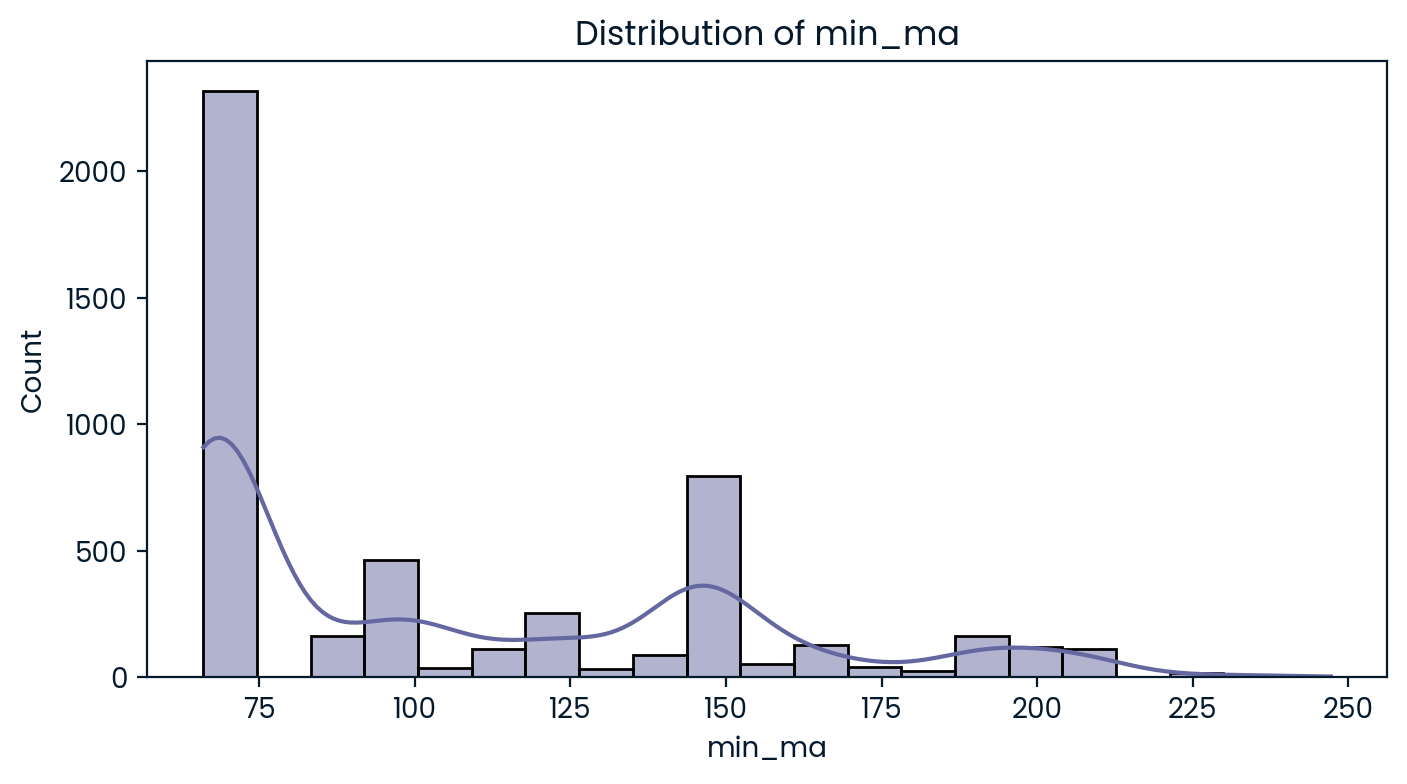

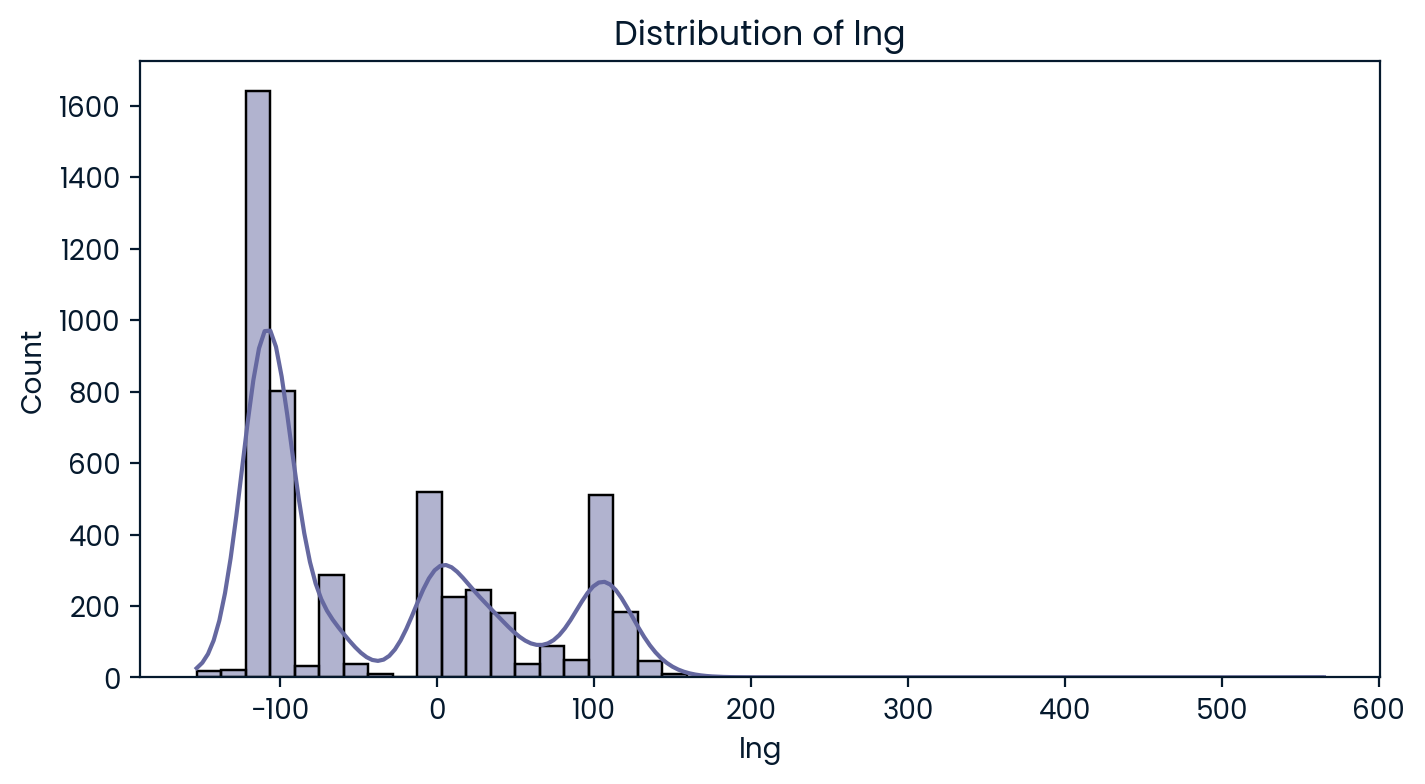

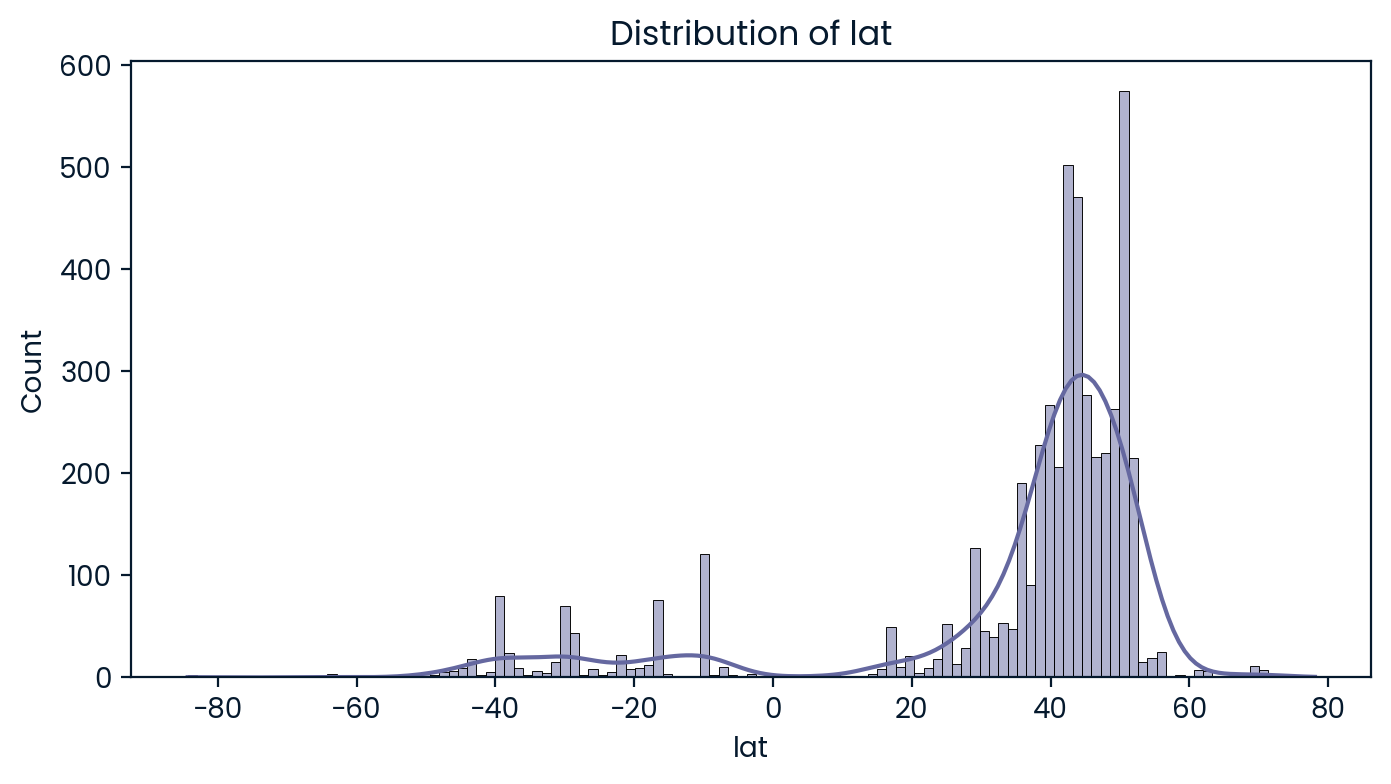

In [8]:
# Distribution of numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Here we have visualized the data in form of a bar graph that shows count(in y-axis) and other numeric variables(in x-axis).

# Relation between Variables

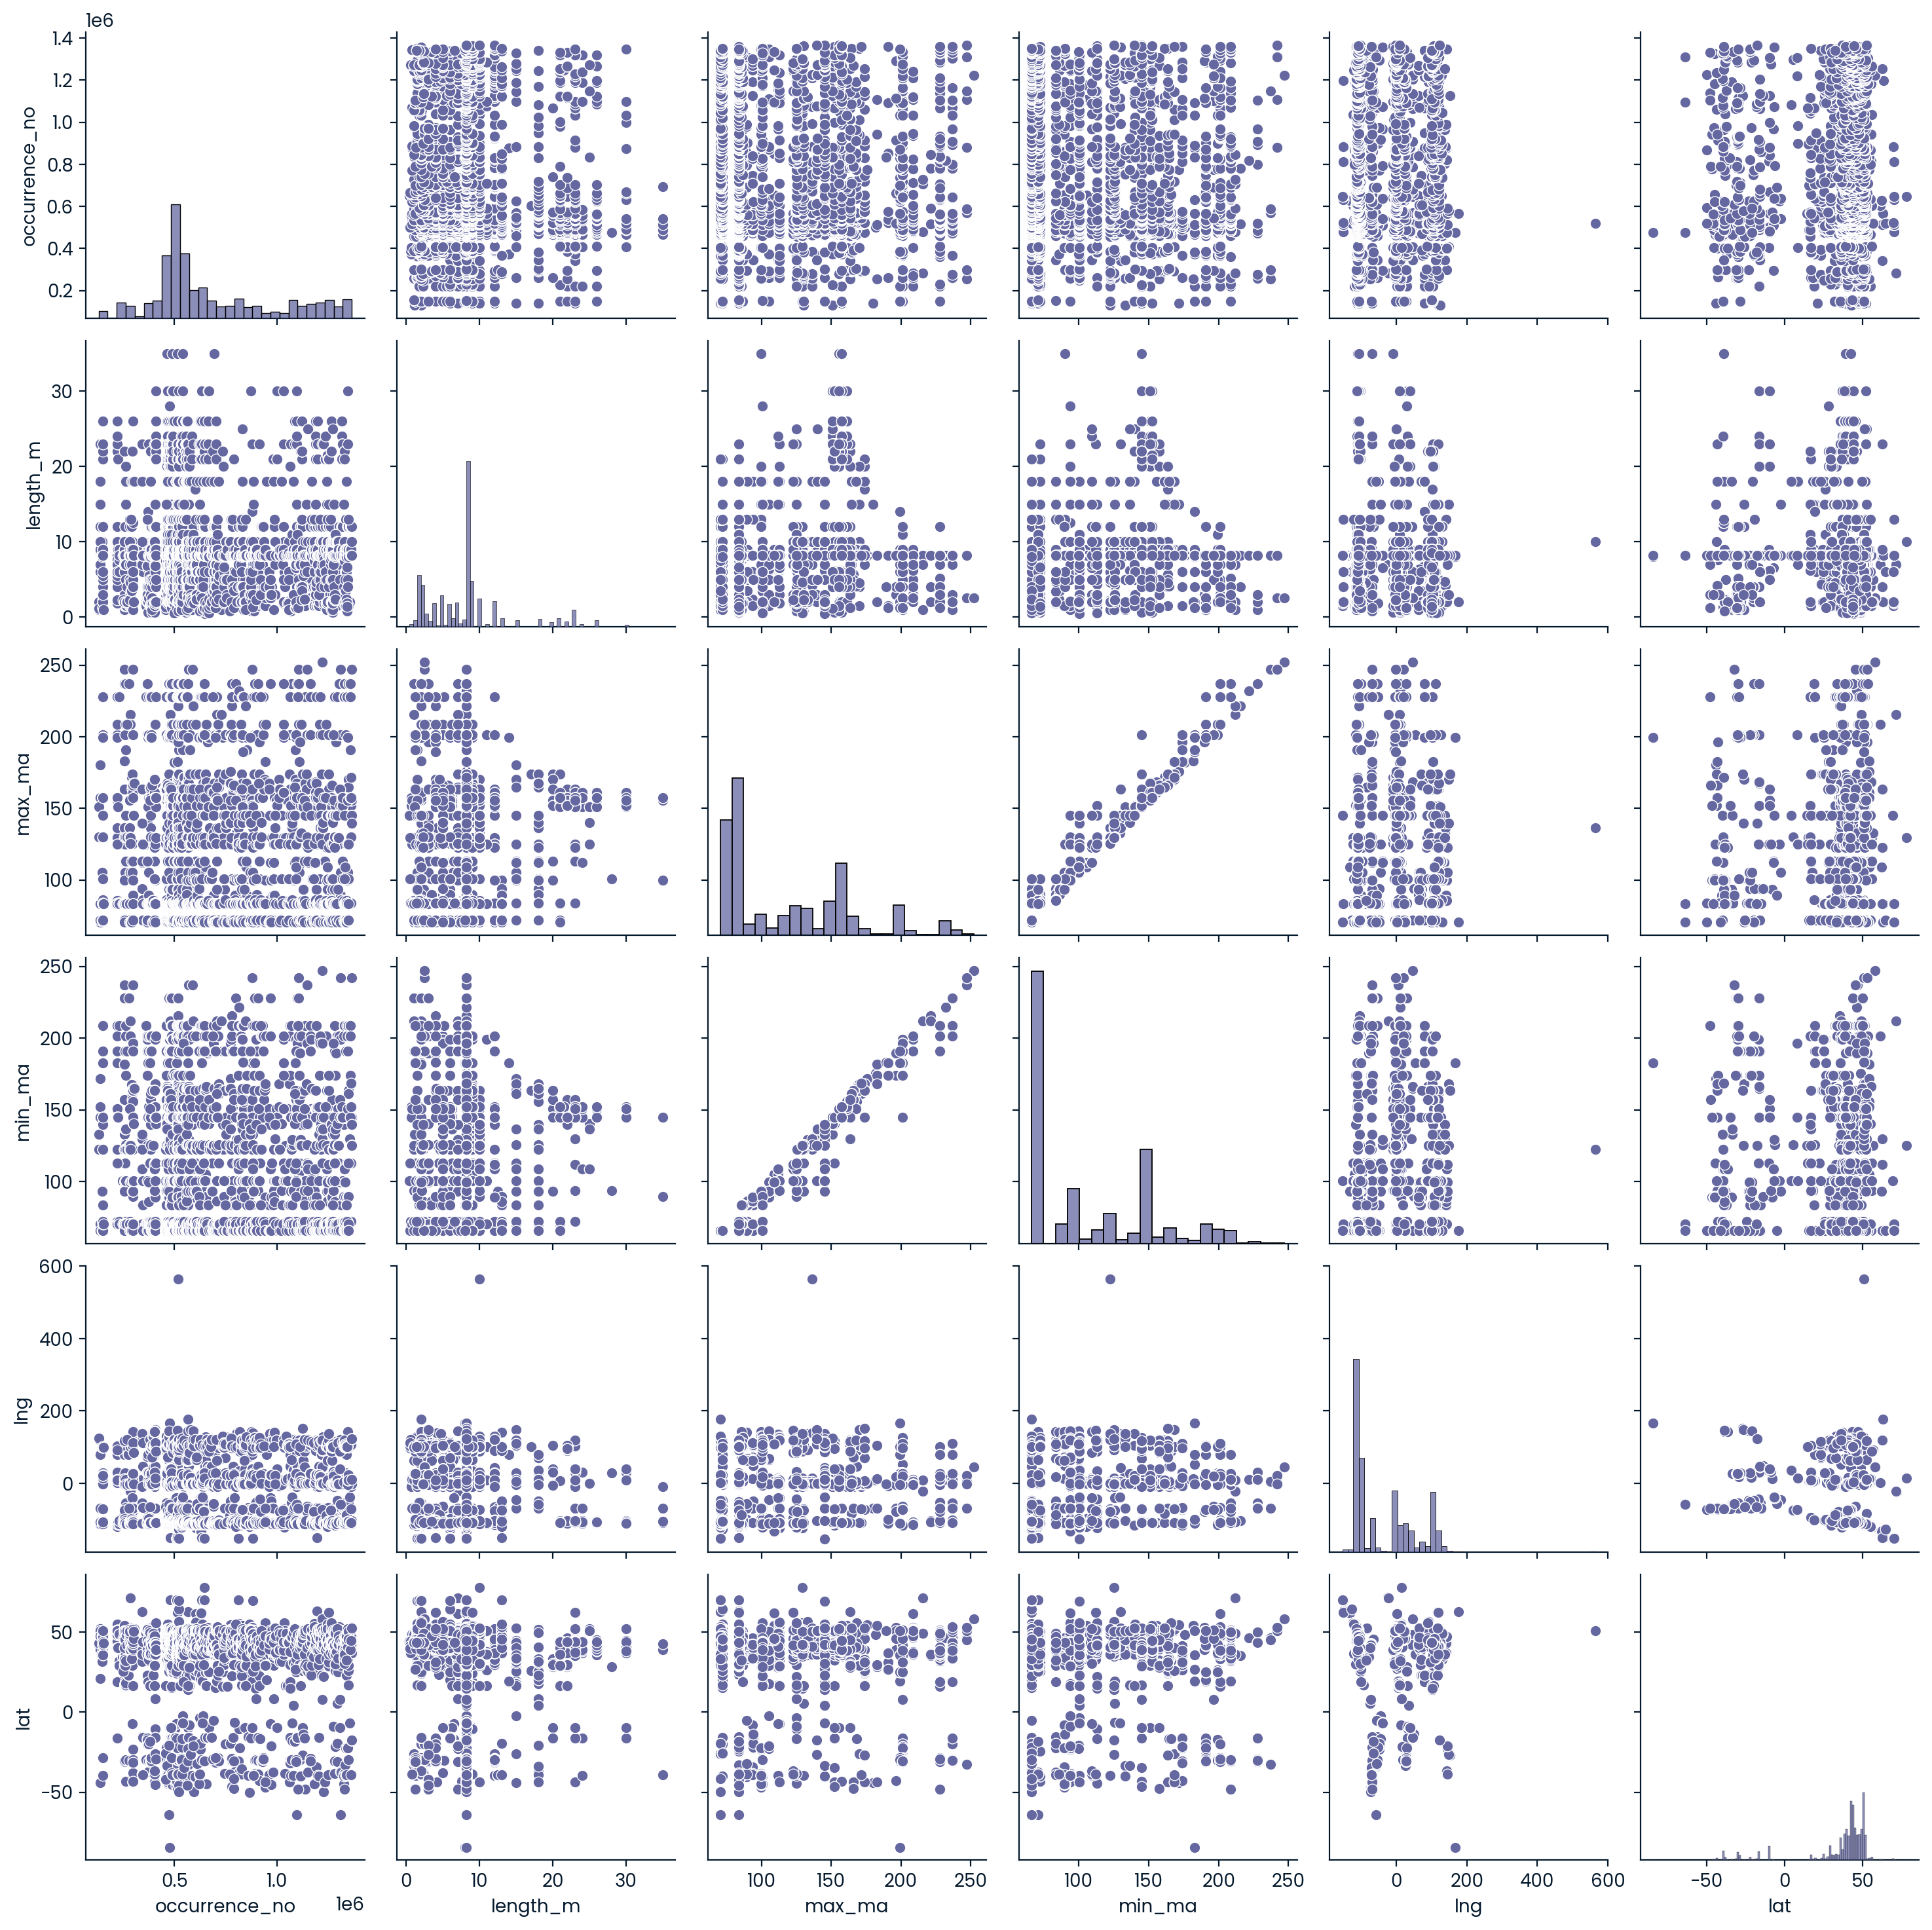

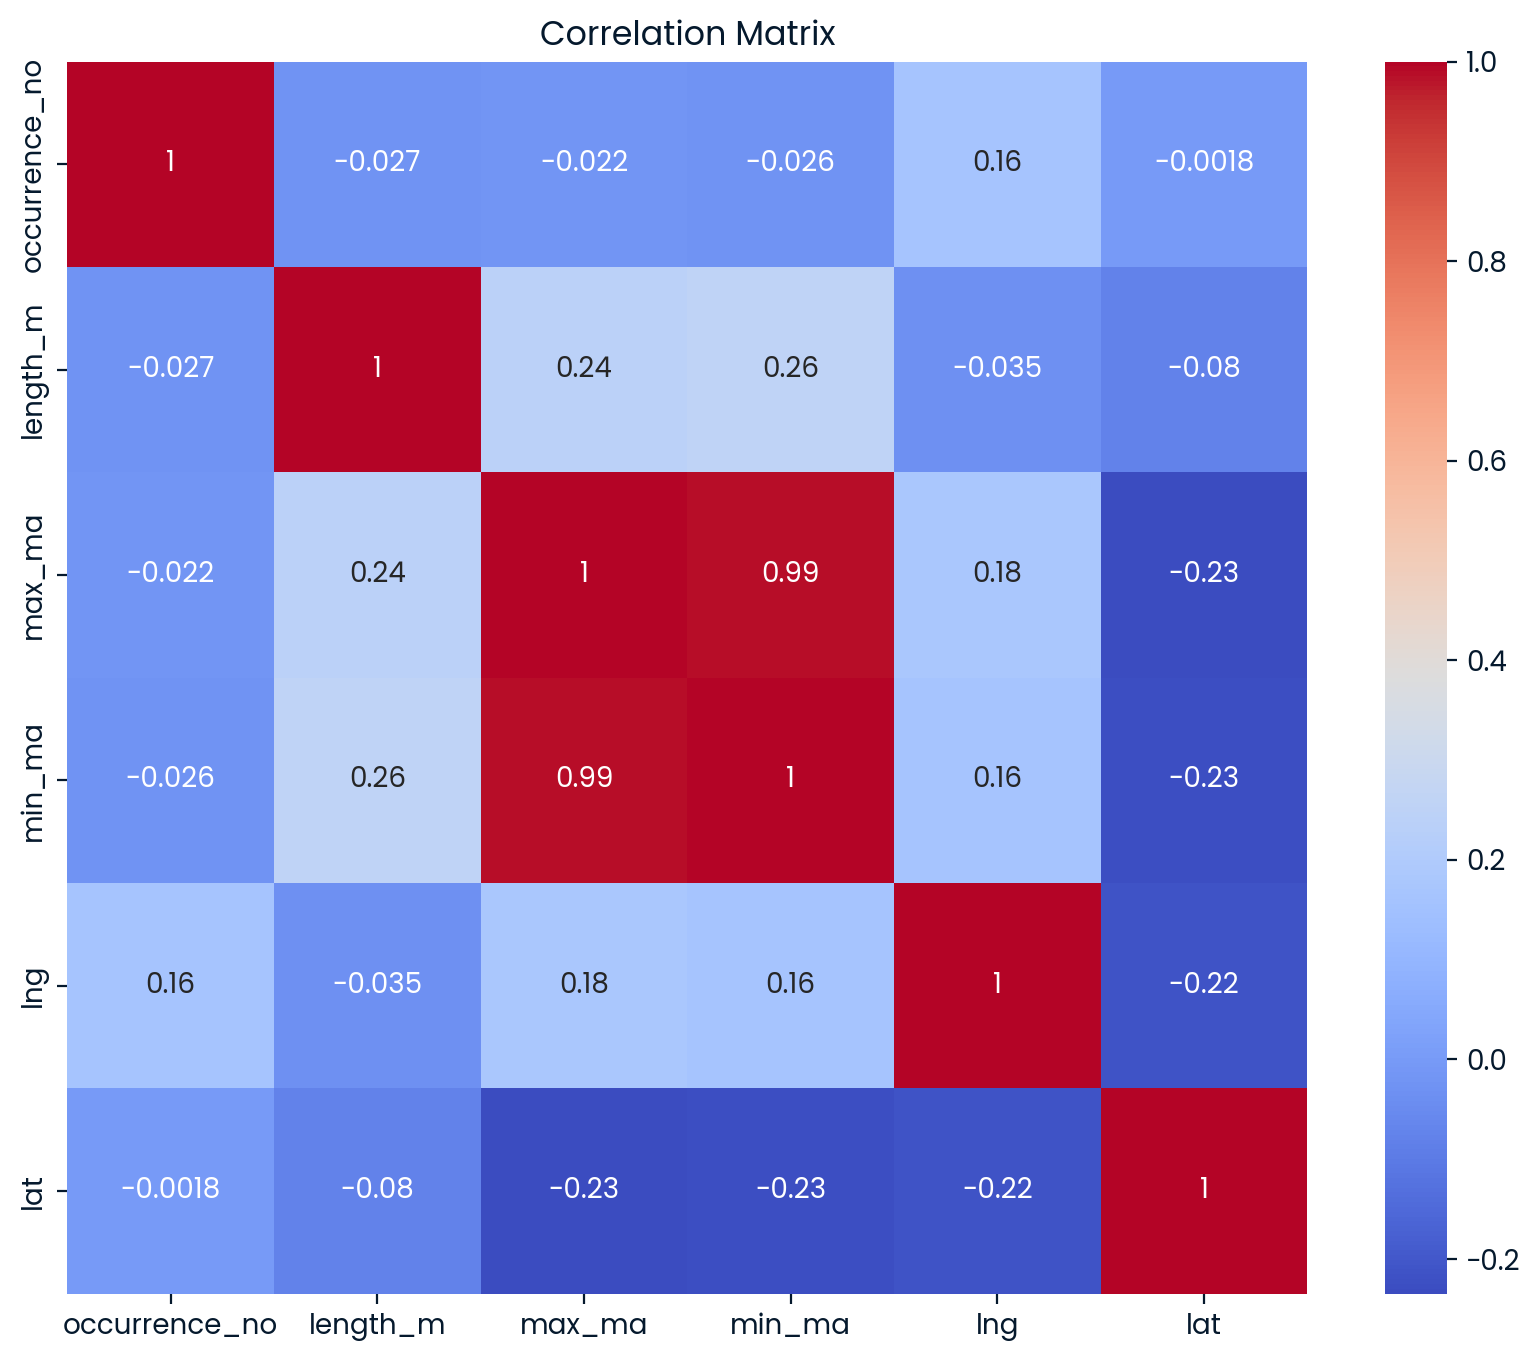

In [9]:

# Pair plot for numerical variables
sns.pairplot(df[num_cols])
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We have a scatterplot matrix and heatmap that shows us the realation among the variables

## To interpret heatmap

* The colors represent the correlation coefficient between two variables. 
* Positive correlations are indicated by colors tending towards 1 (usually warmer colors), while negative correlations are indicated by colors tending towards -1 (usually cooler colors). 
* The annot parameter adds numerical values to each cell, indicating the correlation strength.

# CHALLENGES I

# 1. Number of Different Dinosaur Names

In [10]:
num_dinosaur_names = df['name'].nunique()
print(f'There are {num_dinosaur_names} different dinosaur names in the data.')

There are 1042 different dinosaur names in the data.


# 2.Largest Dinosaur

In [11]:
largest_dinosaur = df.loc[df['length_m'].idxmax()]
print(f'The largest dinosaur is {largest_dinosaur["name"]} with a length of {largest_dinosaur["length_m"]} meters.')

The largest dinosaur is Supersaurus with a length of 35.0 meters.


# 3.Missing Data

In [12]:
missing_percentage = df.isnull().mean() * 100
print("Missing data percentage per column:\n", missing_percentage)


Missing data percentage per column:
 occurrence_no    0.0
name             0.0
diet             0.0
type             0.0
length_m         0.0
max_ma           0.0
min_ma           0.0
region           0.0
lng              0.0
lat              0.0
class            0.0
family           0.0
dtype: float64


This is after null values elimination(For pre-eliminatoin data check cell 19)

# 4. Dinosaur Type with the Most Occurrences

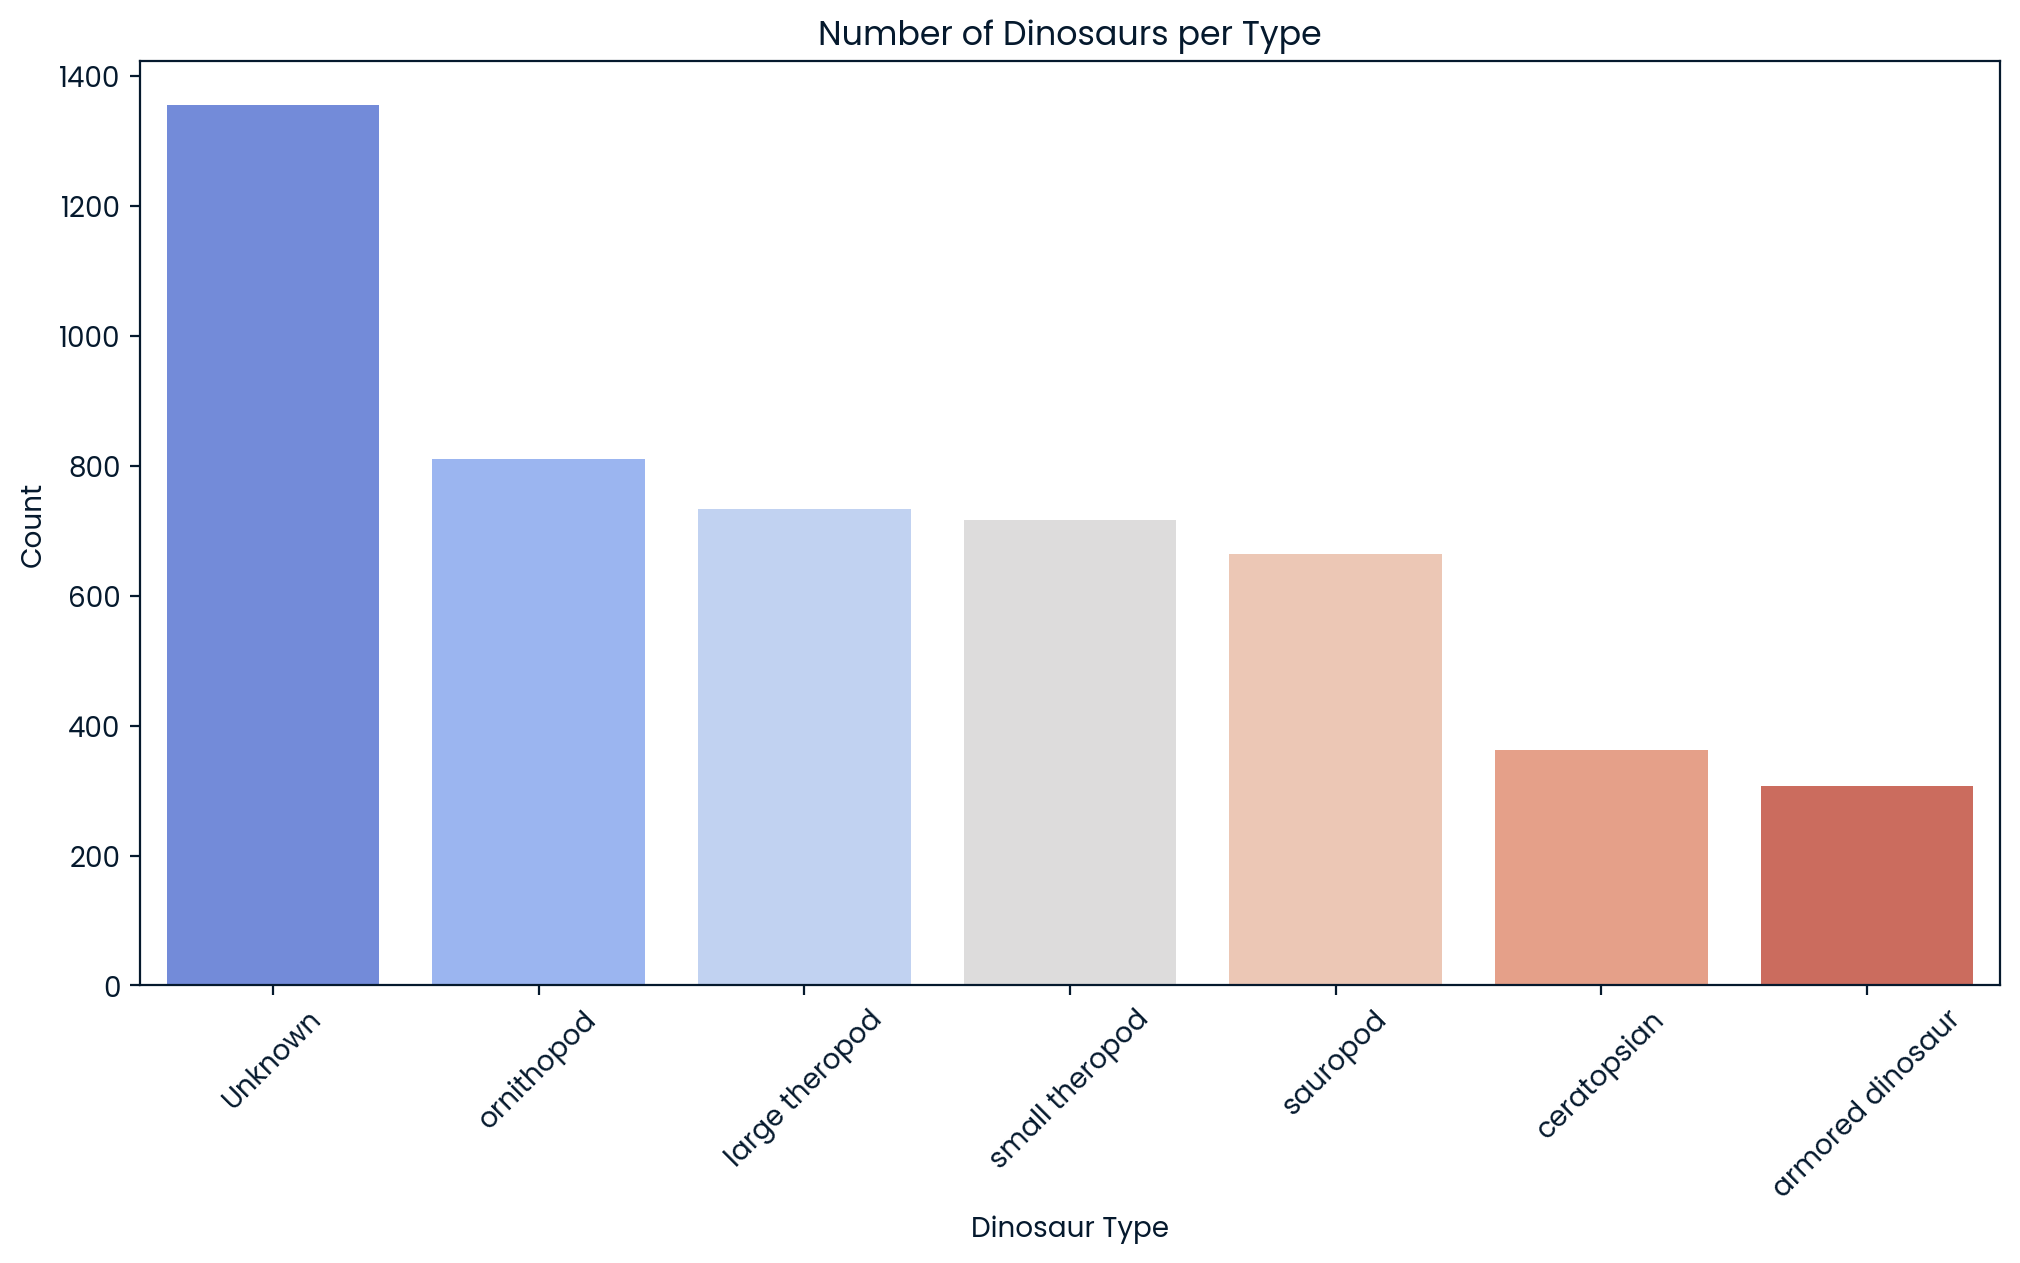

In [14]:
# Count of dinosaurs per type
dinosaur_type_counts = df['type'].value_counts()

# Visualization of dinosaur counts per type
plt.figure(figsize=(12, 6))
sns.barplot(x=dinosaur_type_counts.index, y=dinosaur_type_counts.values, palette='coolwarm')
plt.title('Number of Dinosaurs per Type')
plt.xlabel('Dinosaur Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Here the highest no. of dinosaurs are unknown and the highest known dinosaur are Ornithopod.

# 5. Dinosaur Size Over Time

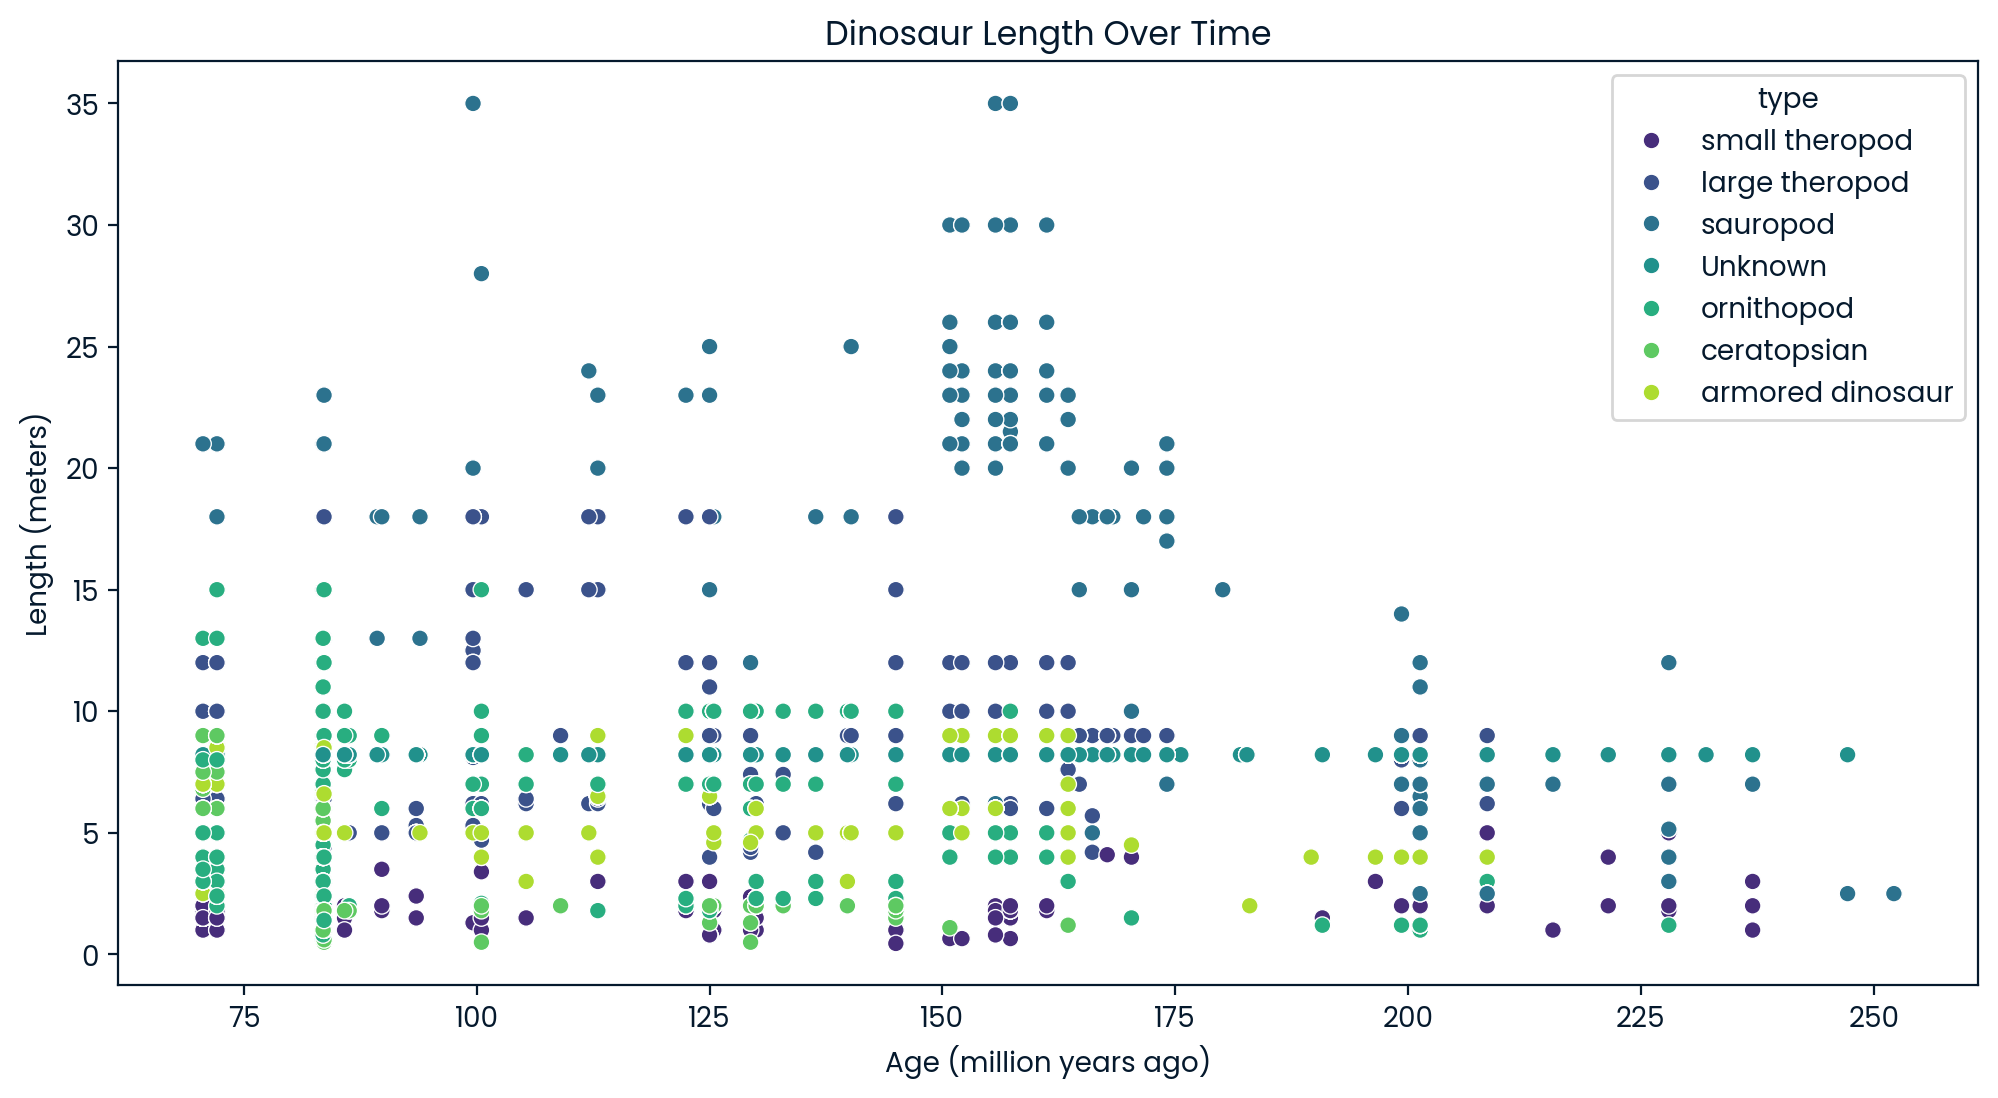

In [15]:
# Scatter plot of dinosaur length vs. age
plt.figure(figsize=(12, 6))
sns.scatterplot(x='max_ma', y='length_m', data=df, hue='type', palette='viridis')
plt.title('Dinosaur Length Over Time')
plt.xlabel('Age (million years ago)')
plt.ylabel('Length (meters)')
plt.show()

# Ovsevation:

Time is not directly related to the growth of dinosaurs as both large and small dinosaurs are found across all periods. However, there is an increase in size diversity over time.

# INTERRACTIVE MAP

In [22]:
m = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Name: {row['name']}<br>Type: {row['type']}<br>Length: {row['length_m']} m<br>Age: {row['max_ma']} - {row['min_ma']} million years ago"
    ).add_to(marker_cluster)

m.save('dinosaur_fossils_map.html')
print("Interactive map saved as 'dinosaur_fossils_map.html'")

Interactive map saved as 'dinosaur_fossils_map.html'


# Conclusion:

# Chapter 1: Temporal Tapestries of Dinolandia

In the grand tapestry of Dinolandia, time flows like a river of ancient echoes. Our journey begins by diving into the mysterious depths of the Mesozoic Era, where the pages of history are written in fossils and bones.

## Epochs of Existence:
Imagine a bustling world 100 to 150 million years ago. This was the Golden Age of Dinosaurs, where a kaleidoscope of species roamed the land. Peaks in our age distribution charts reveal vibrant periods of life, a testament to nature’s evolutionary prowess.
The Great Unraveling: As we sift through the sands of time, certain epochs whisper tales of sudden disappearances and mass extinctions, perhaps hinting at cataclysmic events that reshaped life on Earth.

# Chapter 2: The Cartography of Colossal Creatures
Onward to the geographical heart of Dinolandia, where ancient maps are etched with the trails of titans.

## Continental Chronicles: 

Picture a world map, dotted with red markers—each one a silent witness to the presence of a dinosaur. From the lush plains of Alberta to the mystical lands of Liaoning, these markers tell tales of migration, habitation, and survival.
Hotspots of History: Regions like Alberta, rich with fossils, emerge as key locales in our narrative, inviting us to explore why these areas were so hospitable to ancient giants.
Chapter 3: The Feast of Beasts
Enter the realm of diets, where the culinary preferences of dinosaurs paint a vivid picture of their ecological niches.

## Gourmet Gargantuans: 
In the grand dining halls of Dinolandia, we find a diverse menu. Carnivorous predators, with their sharp teeth and fierce demeanor, stalk the lands. Herbivorous giants, the gentle giants of this world, feast on the abundant flora. Omnivorous opportunists add a touch of versatility to this grand feast.
Regional Recipes: As we journey through different epochs and regions, we discover that dietary habits were not just about survival but also about thriving in the ever-changing landscapes.

# Chapter 4: The Scale of Giants
Our adventure leads us to the towering figures and tiny titans that roamed Dinolandia.

## From Tiny Terror to Massive Marvel: 
The spectrum of dinosaur sizes is a marvel to behold. Small theropods, agile and swift, contrast sharply with the monumental sauropods, whose very steps shook the earth.
## Battle of the Behemoths:
Among the carnivores and herbivores, size tells a story of adaptation and survival. The colossal herbivores wield their size as a defense, while the massive carnivores harness their bulk to dominate the food chain.
Chapter 5: The Clan Chronicles
In the final chapter, we delve into the rich tapestry of dinosaur families and classes, each thread woven with unique evolutionary stories.

## Families of Fame: 
From the fearsome Tyrannosauridae to the enigmatic Archaeopterygidae, these families tell tales of dominance, adaptation, and evolution. The Saurischia class, with its diverse members, stands out as a beacon of prehistoric biodiversity.
##The Evolutionary Epic: Mapping out the families and classes reveals an intricate web of relationships, showcasing how these magnificent creatures adapted to their environments and thrived across millennia.
The Legacy of Dinolandia
As our epic saga draws to a close, we leave with a newfound appreciation for the world of dinosaurs. Each fossil, each bone, is a fragment of a grand story waiting to be told. Through the lens of data, we have glimpsed into their lives, their struggles, and their triumphs.